# codecentric.AI Bootcamp - Convolutional Neural Networks

Hallo und herzlich Willkommen zurück beim **codecentric.AI Bootcamp**.

Heute geht es um **Convolutional Neural Networks**. Dieses Notebook enthält Beispiele und Übungsaufgaben.

Eine theoretische Einführung in Convolutional Neural Networks gibt es in diesem [YouTube video](https://youtu.be/MWPohcMtFLo).

In [1]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/MWPohcMtFLo', width=850, height=650)

Zu diesem Notebook gibt es ebenfalls ein [Video](https://youtu.be/), in dem ich euch durch dieses Beispiel durchführe.

In [ ]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/', width=850, height=650)

## Bibliotheken

Zunächst laden wir die grundlegenden Pakete, die wir für die Vorbereitung der Daten benötigten. Dazu gehören

- **numpy**: NumPy ist das wichtigste Paket für maschinelles Lernen in Python, denn es bietet die nötigen Funktionen für die Arbeit mit Matrizen und n-dimensionalen Arrays, linearer Algebra, und mehr.
- **pandas**: pandas erleichtert das Arbeiten mit Daten in Python.
- **matplotlib**: Zum Erstellen von Graphiken und Abbildungen aus unseren Daten nutzen wir matplotlib. Den zusätzlichen Befehl `matplotlib inline` geben wir in unserem Juypter Notebook mit, damit wir die generierten Plots unterhalb des Code-Chunks sehen können.

In [1]:
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras import *

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# build your own nets
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [3]:
fruit_list = ["Kiwi", "Banana", "Plum", "Apricot", "Avocado", "Cocos", "Clementine", "Mandarine", "Orange",
                "Limes", "Lemon", "Peach", "Plum", "Raspberry", "Strawberry", "Pineapple", "Pomegranate"]
output_n = len(fruit_list)
size = 20
img_width = 20
img_height = 20
channels = 3
train_image_files_path = "/data/fruits-360/Training/"
valid_image_files_path = "/data/fruits-360/Test/"

In [11]:
!ls /.

bin   dev  home  lib64	mnt	   opt	 root  sbin  sys   tmp	var
boot  etc  lib	 media	notebooks  proc  run   srv   tini  usr


In [8]:
beispiel_bilder = !find $train_image_files_path -type f

In [9]:
beispiel_bilder

['find: ‘/data/fruits-360/Training/’: No such file or directory']

In [5]:
num_beispiel_bilder = 24
beispiel_bilder = random.sample(beispiel_bilder, num_beispiel_bilder)

fig = plt.figure(figsize=(12,8))

for i in range(num_beispiel_bilder):
    fig.add_subplot(4, 6, i + 1)
    plt.axis('off')
    img = plt.imread(beispiel_bilder[i])
    plt.imshow(img)

ValueError: Sample larger than population or is negative

In [6]:
#https://www.kaggle.com/moltean/fruits
img_height, img_width = 100, 100

train_image_files_path = "../data/fruits-360/Training/"
valid_image_files_path = "../data/fruits-360/Test/"

train_images = getListOfFiles(train_image_files_path)
valid_images = getListOfFiles(valid_image_files_path)

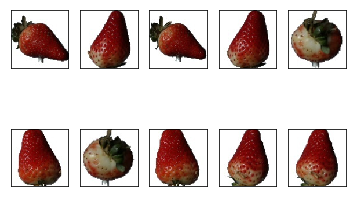

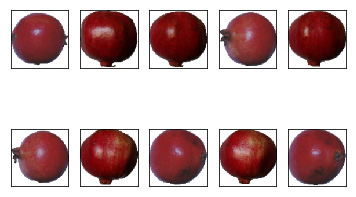

In [23]:
plot_images(imgs=train_images[:10], rows=2, columns=5)
plot_images(imgs=train_images[1000:1010], rows=2, columns=5)

# Keras

https://keras.io/

In [7]:
fruit_list = ["Apricot", "Avocado", "Banana", "Clementine", "Cocos", "Kiwi", "Lemon", "Limes", 
              "Mandarine", "Orange", "Peach", "Pineapple", "Plum", "Pomegranate", "Raspberry", "Strawberry"]
output_n = len(fruit_list)
size = 20
img_width = 20
img_height = 20
channels = 3
batch_size = 32

In [8]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

valid_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

train_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

valid_image_array_gen = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

Found 7709 images belonging to 16 classes.
Found 2428 images belonging to 16 classes.


In [9]:
epochs = 4
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

7709 2428


In [10]:
model = Sequential()

# first hidden layer
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))

# second hidden layer
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flatten max filtered output into feature vector 
# and feed into dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Outputs from dense layer are projected onto output layer
model.add(Dense(output_n))
model.add(Activation('softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        4624      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20, 20, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
__________

In [12]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])

In [13]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/10
240/240 [==============================] - 66s 274ms/step - loss: 1.0541 - acc: 0.6678 - val_loss: 0.1387 - val_acc: 0.9704
Epoch 2/10
240/240 [==============================] - 62s 258ms/step - loss: 0.1710 - acc: 0.9484 - val_loss: 0.0321 - val_acc: 0.9967
Epoch 3/10
240/240 [==============================] - 65s 272ms/step - loss: 0.0513 - acc: 0.9863 - val_loss: 0.0120 - val_acc: 0.9967
Epoch 4/10
240/240 [==============================] - 66s 276ms/step - loss: 0.0207 - acc: 0.9941 - val_loss: 0.0096 - val_acc: 0.9967
Epoch 5/10
240/240 [==============================] - 66s 273ms/step - loss: 0.0108 - acc: 0.9974 - val_loss: 0.0064 - val_acc: 0.9975
Epoch 6/10
240/240 [==============================] - 63s 262ms/step - loss: 0.0056 - acc: 0.9983 - val_loss: 0.0060 - val_acc: 0.9971
Epoch 7/10
240/240 [==============================] - 62s 257ms/step - loss: 0.0026 - acc: 0.9996 - val_loss: 0.0078 - val_acc: 0.9975
Epoch 8/10
240/240 [==============================] - 6

In [14]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


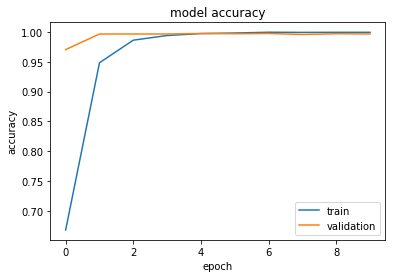

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

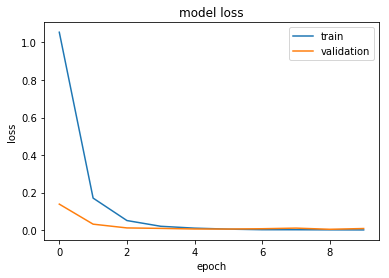

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

### Predict test data

In [18]:
test_image_files_path = "test_images/"
test_images = getListOfFiles(test_image_files_path)
print(test_images)

['test_images/Banana/Banana_wiki.jpg']


In [19]:
classes = train_image_array_gen.class_indices
classes

{'Apricot': 0,
 'Avocado': 1,
 'Banana': 2,
 'Clementine': 3,
 'Cocos': 4,
 'Kiwi': 5,
 'Lemon': 6,
 'Limes': 7,
 'Mandarine': 8,
 'Orange': 9,
 'Peach': 10,
 'Pineapple': 11,
 'Plum': 12,
 'Pomegranate': 13,
 'Raspberry': 14,
 'Strawberry': 15}

In [20]:
def classify_image_model(image, classes=classes):
    img = cv2.imread(image)        
    b,g,r = cv2.split(img)       # get b,g,r
    img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    image = image_utils.load_img(image, target_size=(img_width, img_height))
    image = image_utils.img_to_array(image)

    image = np.expand_dims(image, axis=0)

    # scale pixels between 0 and 1, sample-wise
    image /= 255.
        
    prediction = model.predict(image)
    
    pred = prediction.argmax()

    for k, v in classes.items():
        if (v == pred):
            pred_label = k
        
    proba = prediction.max()
    
    print("Predicted class: " + pred_label + " with probability " + str(proba*100) + "%")

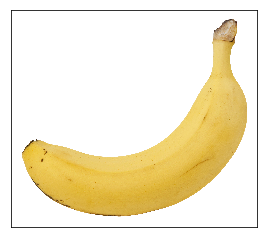

Predicted class: Banana with probability 100.0%


In [21]:
classify_image_model(test_images[0])